<h1>국내 여행 로그 데이터(서부권) (2023)</h1>
<h2>[분석 과정 - Clustering(K-means)]</h2>
<ul>
<li>데이터 정보 및 전처리 과정은 data_preprocessing.ipynb 참고</li></ul>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [32]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import re
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [33]:
# 병합한 데이터 불러오기
travel_log = pd.read_csv('data/training/merged_data/merge.csv', encoding='UTF-8')

In [34]:
# 데이터의 행, 열 개수 출력
print('merge.csv의 행, 열 개수 : ')
print(travel_log.shape)

merge.csv의 행, 열 개수 : 
(2341, 35)


In [35]:
# 데이터의 구조와 타입 확인
print('merge.csv의 구조와 타입 : ')
print(travel_log.info())

merge.csv의 구조와 타입 : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GENDER                     2341 non-null   object 
 1   AGE_GRP                    2341 non-null   int64  
 2   JOB_NM                     2341 non-null   object 
 3   TRAVEL_TERM                2341 non-null   object 
 4   TRAVEL_LIKE_SGG_1          2341 non-null   int64  
 5   TRAVEL_LIKE_SGG_2          2341 non-null   int64  
 6   TRAVEL_LIKE_SGG_3          2341 non-null   int64  
 7   TRAVEL_STYL_1              2341 non-null   object 
 8   TRAVEL_STYL_2              2341 non-null   object 
 9   TRAVEL_STYL_3              2341 non-null   object 
 10  TRAVEL_STYL_4              2341 non-null   object 
 11  TRAVEL_STYL_5              2341 non-null   object 
 12  TRAVEL_STYL_6              2341 non-null   object 
 13  TRAVEL_STYL_7              

In [36]:
# 데이터의 결측치 확인
print('merge.csv의 결측치 : ')
print(travel_log.isnull().sum())

merge.csv의 결측치 : 
GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
MAJOR_TRANSPORT              0
TOTAL_MVMN_WON               0
MAJOR_ACTIVITY_TYPE          0
TOTAL_ACTIVITY_WON   

In [37]:
# 데이터 살펴보기
travel_log.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,MAJOR_TRANSPORT,TOTAL_MVMN_WON,MAJOR_ACTIVITY_TYPE,TOTAL_ACTIVITY_WON,TOTAL_WON,TRAVEL_DURATION,SEASON
0,여,20,학생,1년,50130,50110,26500,자연 선호(강),자연 선호(강),자연 선호(강),자연 선호(약),자연 선호(약),자연 선호(중),도시 선호(중),도시 선호(중),광주광역시,전남,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g002178,['연인'],['남자'],['20대'],쇼핑;SNS 인생샷 여행;시티투어,2023-06-14,2023-06-16,시티투어;쇼핑;SNS 인생샷 여행,['자가용(승용/승합/트럭 등등)'],"10,000.00",['휴식'],"71,700.00","81,700.00",2,Summer
1,남,40,전문가 및 관련 종사자,한달,48840,48220,26500,자연 선호(강),자연 선호(강),자연 선호(약),도시 선호(중),중립,자연 선호(중),도시 선호(강),도시 선호(강),대전광역시,전북,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,g_g004485,['연인'],['남자'],['30대'],쇼핑;역사 유적지 방문;역사 유적지 방문;지역 문화예술/공연/전시시설 관람;유흥/오...,2023-07-28,2023-07-30,쇼핑;역사 유적지 방문;지역 문화예술/공연/전시시설 관람,['자가용(승용/승합/트럭 등등)'],"32,600.00",['체험 활동 / 입장 및 관람'],"273,800.00","306,400.00",2,Summer
2,남,20,관리자,1년,46710,45190,47170,자연 선호(중),자연 선호(약),자연 선호(강),중립,도시 선호(중),자연 선호(약),자연 선호(강),도시 선호(강),서울특별시,전남,2인 여행(가족 외),새로운 경험 추구,1,g_g005167,['연인'],['여자'],['20대'],"테마파크, 놀이시설, 동/식물원 방문;Well-ness 여행;SNS 인생샷 여행;신...",2023-09-07,2023-09-10,SNS 인생샷 여행;신규 여행지 발굴;역사 유적지 방문,['자가용(승용/승합/트럭 등등)'],"138,400.00",['취식'],"450,200.00","588,600.00",3,Autumn
3,여,30,사무 종사자,한달,42150,42210,28710,자연 선호(중),자연 선호(중),자연 선호(약),자연 선호(중),자연 선호(약),도시 선호(약),자연 선호(중),도시 선호(중),인천광역시,대전,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g002887,['배우자'],['여자'],['30대'],쇼핑;시티투어;지역 축제/이벤트 참가;SNS 인생샷 여행;호캉스 여행,2023-07-01,2023-07-03,쇼핑;지역 축제/이벤트 참가;호캉스 여행,['자가용(승용/승합/트럭 등등)'],"70,000.00","['쇼핑 / 구매', '취식']","119,100.00","189,100.00",2,Summer
4,남,20,서비스 종사자,한달,42150,50110,26350,자연 선호(중),자연 선호(강),자연 선호(중),중립,도시 선호(중),도시 선호(약),도시 선호(중),도시 선호(약),경기도,충남,2인 여행(가족 외),"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,g_g004189,['연인'],['남자'],['20대'],"SNS 인생샷 여행;야외 스포츠, 레포츠 활동;유흥/오락(나이트라이프)",2023-07-18,2023-07-20,"Well-ness 여행;야외 스포츠, 레포츠 활동;SNS 인생샷 여행",['자가용(승용/승합/트럭 등등)'],"52,083.00",['취식'],"120,450.00","172,533.00",2,Summer


<hr>
<h2>[분석 과정 - 군집화]</h2>

1. 원핫 인코딩 등 군집화를 위한 전처리 과정
<br>
<br>군집화 시에는 TRAVEL_ID 별로 군집화를 진행함

In [38]:
# # 제외할 컬럼 리스트
# exclude_columns = ['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']

# # TRAVEL_ID별로 그룹화 후, 값을 비교하여 동일하지 않으면 해당 행의 인덱스를 출력
# def check_non_matching_rows(group):
#     non_matching_found = False  # 동일하지 않은 값이 있는지 확인하는 플래그
    
#     # 그룹 내의 값이 모두 동일한지 확인
#     for col in group.columns:
#         if col not in exclude_columns:
#             unique_values = group[col].nunique()
#             if unique_values > 1:  # 값이 1개 이상 다르면
#                 print(f"Column '{col}' has non-matching values in TRAVEL_ID {group['TRAVEL_ID'].iloc[0]}")
#                 non_matching_found = True
#                 break

#     if not non_matching_found:
#         return False  # 값이 동일한 경우
#     return True  # 값이 다를 경우

# # TRAVEL_ID별로 그룹화 후 비일치 값 검사
# travel_log_grouped = travel_log.groupby('TRAVEL_ID')

# # 모든 결과를 기록할 플래그
# any_non_matching = False

# # 각 그룹에 대해 확인
# for travel_id, group in travel_log_grouped:
#     if check_non_matching_rows(group):
#         any_non_matching = True

# # 모든 TRAVEL_ID에 대해 값이 다르지 않으면 알려주기
# if not any_non_matching:
#     print("모든 TRAVEL_ID에서 값이 다르지 않습니다.")

In [39]:
# TRAVEL_ID 중복 여부 확인
duplicate_ids = travel_log['TRAVEL_ID'].value_counts()

# 중복된 TRAVEL_ID 필터링 (횟수가 1보다 큰 경우)
duplicate_ids = duplicate_ids[duplicate_ids > 1]

# 중복 여부 출력
if not duplicate_ids.empty:
    print("중복된 TRAVEL_ID가 있습니다:")
    print(duplicate_ids)
else:
    print("모든 TRAVEL_ID가 고유합니다.")

모든 TRAVEL_ID가 고유합니다.


> TRAVEL_ID가 중복되는 행이 존재하지 않으므로 요약 통계량을 계산할 필요가 없음

In [40]:
# 선택할 변수 지정
selected_columns = [
    'REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP', 'TRAVEL_ID', 'GENDER', 'AGE_GRP', 'JOB_NM', 'TRAVEL_TERM', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3', 'TRAVEL_STYL_1',
    'TRAVEL_STYL_2', 'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_STATUS_ACCOMPANY', 
    'TRAVEL_MOTIVE', 'TRAVEL_COMPANIONS_NUM', 'TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TOTAL_WON', 'TRAVEL_DURATION', 'SEASON', 'MAJOR_ACTIVITY_TYPE'
]

# 선택된 변수만 포함한 DataFrame 생성
filtered_data = travel_log[selected_columns]

# TRAVEL_ID 기준 그룹화
travel_log_grouped = filtered_data.groupby('TRAVEL_ID').apply(lambda x: x).reset_index(drop=True)

# 결과 확인
print(travel_log_grouped.head())

                            REL_CD                COMPANION_GENDER                      COMPANION_AGE_GRP  TRAVEL_ID GENDER  AGE_GRP   JOB_NM TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3 TRAVEL_STYL_1 TRAVEL_STYL_2 TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY                     TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON  TRAVEL_DURATION  SEASON  MAJOR_ACTIVITY_TYPE
0                          ['배우자']                          ['남자']                                ['30대']  e_e000005      여       30   사무 종사자          한달              44180              50130              50110            중립      자연 선호(강)                   대전광역시                        인천                2인 가족 여행                         새로운 경험 추구                      1      112,300.00          413,500.00 525,800.00                4  Spring               ['취식']
1                               없음                              없음        

In [41]:
# # TRAVEL_ID별로 그룹화하여 요약 통계 계산
# travel_log_grouped = travel_log.groupby('TRAVEL_ID').agg({
#     'GENDER': 'first',  # 동일한 TRAVEL_ID에 대해 GENDER는 하나만 취함
#     'AGE_GRP': 'first', 
#     'JOB_NM': 'first', 
#     'TRAVEL_TERM': 'first',
#     'TRAVEL_LIKE_SGG_1': 'first', 
#     'TRAVEL_LIKE_SGG_2': 'first',
#     'TRAVEL_LIKE_SGG_3': 'first',
#     'TRAVEL_STYL_1': 'first',
#     'TRAVEL_STYL_2': 'first',
#     'TRAVEL_STATUS_RESIDENCE': 'first',
#     'TRAVEL_STATUS_DESTINATION': 'first',
#     'TRAVEL_STATUS_ACCOMPANY': 'first',
#     'TRAVEL_MOTIVE': 'first',
#     'TRAVEL_COMPANIONS_NUM': 'first',  # 수치형 변수는 평균으로 취합
#     'TOTAL_MVMN_WON': 'mean', 
#     'TOTAL_ACTIVITY_WON': 'mean',
#     'TOTAL_WON': 'mean',
#     'TRAVEL_DURATION': 'first',
#     'SEASON': 'first',
#     'MAJOR_ACTIVITY_TYPE': 'first' 
# }).reset_index()

# travel_log_grouped

In [42]:
# MAJOR_ACTIVITY_TYPE: 리스트 형태로 분리 후 원핫 인코딩
mlb = MultiLabelBinarizer()
major_activity_type_encoded = pd.DataFrame(mlb.fit_transform(travel_log_grouped['MAJOR_ACTIVITY_TYPE'].apply(eval)),
                                           columns=mlb.classes_)

# REL_CD: 리스트 형태로 원핫 인코딩
mlb_rel_cd = MultiLabelBinarizer()
rel_cd_encoded = pd.DataFrame(
    mlb_rel_cd.fit_transform(travel_log_grouped['REL_CD']),
    columns=[f"REL_CD_{col}" for col in mlb_rel_cd.classes_]
)

# COMPANION_GENDER: 리스트 형태로 원핫 인코딩
mlb_gender = MultiLabelBinarizer()
companion_gender_encoded = pd.DataFrame(
    mlb_gender.fit_transform(travel_log_grouped['COMPANION_GENDER']),
    columns=[f"COMPANION_GENDER_{col}" for col in mlb_gender.classes_]
)

# COMPANION_AGE_GRP: 리스트 형태로 원핫 인코딩
mlb_age_grp = MultiLabelBinarizer()
companion_age_grp_encoded = pd.DataFrame(
    mlb_age_grp.fit_transform(travel_log_grouped['COMPANION_AGE_GRP']),
    columns=[f"COMPANION_AGE_GRP_{col}" for col in mlb_age_grp.classes_]
)

# 범주형 변수 원핫 인코딩
categorical_columns = ['GENDER', 'JOB_NM', 'TRAVEL_TERM', 'TRAVEL_STYL_1', 'TRAVEL_STYL_2',
                       'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_DESTINATION', 'TRAVEL_STATUS_ACCOMPANY', 
                       'TRAVEL_MOTIVE', 'SEASON']
travel_log_encoded = pd.get_dummies(travel_log_grouped[categorical_columns])

# 수치형 변수 스케일링 (정규화)
numerical_columns = ['AGE_GRP', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_LIKE_SGG_3',
                     'TRAVEL_COMPANIONS_NUM', 'TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TOTAL_WON', 'TRAVEL_DURATION']
scaler = StandardScaler()
travel_log_scaled = pd.DataFrame(scaler.fit_transform(travel_log_grouped[numerical_columns]), columns=numerical_columns)

# 데이터프레임 합치기
travel_log_final = pd.concat([travel_log_encoded, travel_log_scaled, major_activity_type_encoded], axis=1)

# 군집화에 사용할 최종 데이터프레임
print(travel_log_final.head())


   GENDER_남  GENDER_여  JOB_NM_관리자  JOB_NM_군인  JOB_NM_기능원 및 관련 기능 종사자  JOB_NM_기타  JOB_NM_농림어업 숙련 종사자  JOB_NM_단순노무종사자  JOB_NM_사무 종사자  JOB_NM_서비스 종사자  JOB_NM_장치․기계 조작 및 조립 종사자  JOB_NM_전문가 및 관련 종사자  JOB_NM_전업주부  JOB_NM_판매 종사자  JOB_NM_학생  TRAVEL_TERM_1년  TRAVEL_TERM_1주일  TRAVEL_TERM_기타  TRAVEL_TERM_한달  TRAVEL_STYL_1_도시 선호(강)  TRAVEL_STYL_1_도시 선호(약)  TRAVEL_STYL_1_도시 선호(중)  TRAVEL_STYL_1_자연 선호(강)  TRAVEL_STYL_1_자연 선호(약)  TRAVEL_STYL_1_자연 선호(중)  TRAVEL_STYL_1_중립  TRAVEL_STYL_2_도시 선호(강)  TRAVEL_STYL_2_도시 선호(약)  TRAVEL_STYL_2_도시 선호(중)  TRAVEL_STYL_2_자연 선호(강)  TRAVEL_STYL_2_자연 선호(약)  TRAVEL_STYL_2_자연 선호(중)  TRAVEL_STYL_2_중립  TRAVEL_STATUS_RESIDENCE_강원도  TRAVEL_STATUS_RESIDENCE_경기도  TRAVEL_STATUS_RESIDENCE_경상남도  TRAVEL_STATUS_RESIDENCE_경상북도  TRAVEL_STATUS_RESIDENCE_광주광역시  TRAVEL_STATUS_RESIDENCE_대구광역시  TRAVEL_STATUS_RESIDENCE_대전광역시  TRAVEL_STATUS_RESIDENCE_부산광역시  TRAVEL_STATUS_RESIDENCE_서울특별시  TRAVEL_STATUS_RESIDENCE_세종특별자치시  TRAVEL_STATUS_RESIDENCE_울산광역시  TRAVEL_STATUS_RESIDENCE_인천광역시  \
0     F

2. 군집화

In [43]:
# # 최종보고서 X 군집화 및 시각화 함수 정의
# def kmeans_clustering_and_visualization(k, random_state_range):
#     for random_state in random_state_range:
#         print(f"Random State: {random_state}, Cluster Count: {k}")
        
#         # KMeans 군집화
#         kmeans = KMeans(n_clusters=k, random_state=random_state)
#         travel_log_grouped['Cluster'] = kmeans.fit_predict(travel_log_final)  # travel_log_final을 사용하여 군집화
        
#         # 각 군집에 속한 데이터 포인트의 수 확인
#         cluster_sizes = travel_log_grouped['Cluster'].value_counts()
#         print("군집 크기:")
#         print(cluster_sizes)
        
#         # 실루엣 계수 계산
#         silhouette = silhouette_score(travel_log_final, travel_log_grouped['Cluster'])
#         print(f"실루엣 계수: {silhouette:.4f}")
        
#         # PCA를 이용하여 2차원으로 축소
#         pca = PCA(n_components=2)
#         pca_components = pca.fit_transform(travel_log_final)  # travel_log_final에서 PCA 수행

#         # PCA 결과를 travel_log_grouped에 추가
#         travel_log_grouped['pca_x'] = pca_components[:, 0]
#         travel_log_grouped['pca_y'] = pca_components[:, 1]

#         # 군집화 결과 시각화
#         plt.figure(figsize=(12, 8))
#         sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_grouped, palette='deep')
#         plt.title(f'K-means Clustering 결과 (K={k}, Random State={random_state})')
#         plt.show()

# # 3개 군집과 4개 군집에 대해 random_state를 0에서 50까지 시도
# kmeans_clustering_and_visualization(3, range(0, 51))  # 군집 수 3일 때
# kmeans_clustering_and_visualization(4, range(0, 51))  # 군집 수 4일 때


In [44]:
# # 최종보고서 X 군집화 및 시각화 함수 정의
# def kmeans_clustering_and_visualization(k, random_state_list):
#     for random_state in random_state_list:
#         print(f"Random State: {random_state}, Cluster Count: {k}")
        
#         # KMeans 군집화
#         kmeans = KMeans(n_clusters=k, random_state=random_state)
#         travel_log_grouped['Cluster'] = kmeans.fit_predict(travel_log_final)  # travel_log_final을 사용하여 군집화
        
#         # 각 군집에 속한 데이터 포인트의 수 확인
#         cluster_sizes = travel_log_grouped['Cluster'].value_counts()
#         print("군집 크기:")
#         print(cluster_sizes)
        
#         # 실루엣 계수 계산
#         silhouette = silhouette_score(travel_log_final, travel_log_grouped['Cluster'])
#         print(f"실루엣 계수: {silhouette:.4f}")
        
#         # PCA를 이용하여 2차원으로 축소
#         pca = PCA(n_components=2)
#         pca_components = pca.fit_transform(travel_log_final)  # travel_log_final에서 PCA 수행

#         # PCA 결과를 travel_log_grouped에 추가
#         travel_log_grouped['pca_x'] = pca_components[:, 0]
#         travel_log_grouped['pca_y'] = pca_components[:, 1]

#         # 군집화 결과 시각화
#         plt.figure(figsize=(12, 8))
#         sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_grouped, palette='deep')
#         plt.title(f'K-means Clustering 결과 (K={k}, Random State={random_state})')
#         plt.show()

# # n_cluster가 3일 때 선택한 random_state
# random_states_3 = [0, 24, 40, 10, 47, 41, 2, 18, 9, 16]

# # n_cluster가 4일 때 선택한 random_state
# random_states_4 = [36, 39, 7, 20, 9, 3, 2, 10, 24]

# # 3개 군집에 대해 시도
# kmeans_clustering_and_visualization(3, random_states_3)

# # 4개 군집에 대해 시도
# kmeans_clustering_and_visualization(4, random_states_4)


In [45]:
# 최종보고서 X # 군집화 및 시각화 함수 정의
# def kmeans_clustering_and_visualization(k, random_state):
#     print(f"Random State: {random_state}, Cluster Count: {k}")
    
#     # KMeans 군집화
#     kmeans = KMeans(n_clusters=k, random_state=random_state)
#     travel_log_grouped['Cluster'] = kmeans.fit_predict(travel_log_final)  # travel_log_final을 사용하여 군집화
    
#     # 각 군집에 속한 데이터 포인트의 수 확인
#     cluster_sizes = travel_log_grouped['Cluster'].value_counts()
#     print("군집 크기:")
#     print(cluster_sizes)
    
#     # 실루엣 계수 계산
#     silhouette = silhouette_score(travel_log_final, travel_log_grouped['Cluster'])
#     print(f"실루엣 계수: {silhouette:.4f}")
    
#     # PCA를 이용하여 2차원으로 축소
#     pca = PCA(n_components=2)
#     pca_components = pca.fit_transform(travel_log_final)  # travel_log_final에서 PCA 수행

#     # PCA 결과를 travel_log_grouped에 추가
#     travel_log_grouped['pca_x'] = pca_components[:, 0]
#     travel_log_grouped['pca_y'] = pca_components[:, 1]

#     # 군집화 결과 시각화
#     plt.figure(figsize=(12, 8))
#     sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_grouped, palette='deep')
#     plt.title(f'K-means Clustering 결과 (K={k}, Random State={random_state})')
#     plt.show()

# # n_cluster가 3일 때 random_state=41
# kmeans_clustering_and_visualization(3, 41)

# # n_cluster가 4일 때 random_state=36
# kmeans_clustering_and_visualization(4, 36)


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\skl

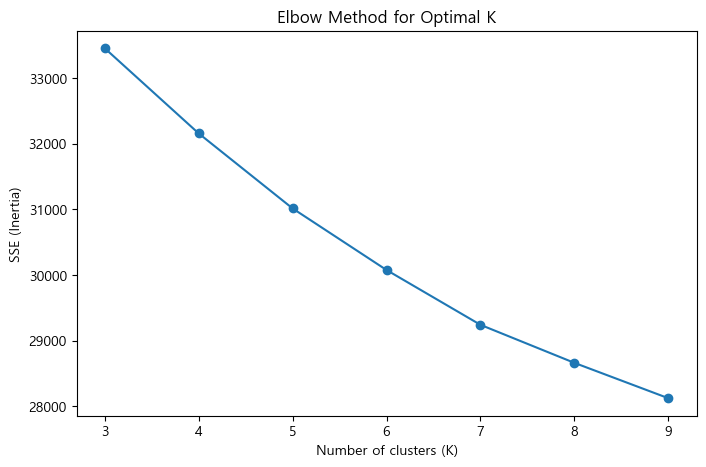

c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3, Silhouette Score=0.0718
K=4, Silhouette Score=0.0651


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5, Silhouette Score=0.0653
K=6, Silhouette Score=0.0653


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=7, Silhouette Score=0.0662
K=8, Silhouette Score=0.0552


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=9, Silhouette Score=0.0592

Optimal K: 3, Best Silhouette Score: 0.0718


In [46]:
# Elbow Method: SSE 계산
sse = []
k_range = range(3, 10)  # K를 3~9까지 시도
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(travel_log_final)
    sse.append(kmeans.inertia_)

# Elbow Method 그래프
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Silhouette Score 계산
best_k = 0
best_score = -1
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(travel_log_final)
    score = silhouette_score(travel_log_final, labels)
    print(f'K={k}, Silhouette Score={score:.4f}')
    if score > best_score:
        best_k = k
        best_score = score

print(f'\nOptimal K: {best_k}, Best Silhouette Score: {best_score:.4f}')

> 분석 결과 : k가 2인 경우는 군집 수가 작아 해결 방안을 도출하기에 적절하지 않다고 판단하여, 3~9 까지의 실루엣 계수를 계산
<br>3일 때 실루엣 계수가 가장 높으므로 k를 3으로 결정함

In [47]:
# KMeans 초기화 및 random_state 테스트
best_random_state = None
best_score = -1

for random_state in range(50):  # random_state 0~49 시도
    kmeans = KMeans(n_clusters=3, random_state=random_state)
    labels = kmeans.fit_predict(travel_log_final)
    score = silhouette_score(travel_log_final, labels)
    print(f'Random State: {random_state}, Silhouette Score: {score:.4f}')
    
    if score > best_score:
        best_score = score
        best_random_state = random_state

print(f'\nBest Random State: {best_random_state}, Best Silhouette Score: {best_score:.4f}')

Random State: 0, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 1, Silhouette Score: 0.0719
Random State: 2, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 3, Silhouette Score: 0.0718
Random State: 4, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 5, Silhouette Score: 0.0718
Random State: 6, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 7, Silhouette Score: 0.0718
Random State: 8, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 9, Silhouette Score: 0.0718
Random State: 10, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 11, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 12, Silhouette Score: 0.0718
Random State: 13, Silhouette Score: 0.0716


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 14, Silhouette Score: 0.0718
Random State: 15, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 16, Silhouette Score: 0.0718
Random State: 17, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 18, Silhouette Score: 0.0718
Random State: 19, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 20, Silhouette Score: 0.0716
Random State: 21, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 22, Silhouette Score: 0.0718
Random State: 23, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 24, Silhouette Score: 0.0718
Random State: 25, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 26, Silhouette Score: 0.0718
Random State: 27, Silhouette Score: 0.0719


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 28, Silhouette Score: 0.0718
Random State: 29, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 30, Silhouette Score: 0.0718
Random State: 31, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 32, Silhouette Score: 0.0718
Random State: 33, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 34, Silhouette Score: 0.0718
Random State: 35, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 36, Silhouette Score: 0.0718
Random State: 37, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 38, Silhouette Score: 0.0718
Random State: 39, Silhouette Score: 0.0714


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 40, Silhouette Score: 0.0718
Random State: 41, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 42, Silhouette Score: 0.0718
Random State: 43, Silhouette Score: 0.0717


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 44, Silhouette Score: 0.0718
Random State: 45, Silhouette Score: 0.0718


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 46, Silhouette Score: 0.0718
Random State: 47, Silhouette Score: 0.0717


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Random State: 48, Silhouette Score: 0.0718
Random State: 49, Silhouette Score: 0.0718

Best Random State: 1, Best Silhouette Score: 0.0719


c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


> 분석 결과 : random_state가 42일 때 실루엣 계수가 가장 높지만, 이후 PCA를 이용하여 2차원으로 축소한 후 시각화 한 결과 등을 종합적으로 고려하여 random_stater를 41로 결정
<br>(재경아 이거 보고서에 이렇게 적기에 약간 타당성 떨어져 보이면 그냥 random_state 결정하는 건 건너뛰고 위에 k 3으로 정한 것만 적어도 될 것 같아!!)

In [48]:
# KMeans 군집화
kmeans = KMeans(n_clusters=3, random_state=41)
travel_log_grouped['Cluster'] = kmeans.fit_predict(travel_log_final)  # travel_log_final을 사용하여 군집화

# 군집화 결과 확인
print(travel_log_grouped[['TRAVEL_ID', 'Cluster']].head())

c:\Users\kimbomi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   TRAVEL_ID  Cluster
0  e_e000005        1
1  e_e000043        0
2  e_e000191        1
3  e_e000316        1
4  e_e000668        2


In [49]:
# 각 군집에 속한 데이터 포인트의 수를 확인
cluster_sizes = travel_log_grouped['Cluster'].value_counts()

# 군집 크기 출력
print(cluster_sizes)

Cluster
0    1160
2     719
1     462
Name: count, dtype: int64


   TRAVEL_ID  Cluster
0  e_e000005        1
1  e_e000043        0
2  e_e000191        1
3  e_e000316        1
4  e_e000668        2


C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\1196365997.py:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_grouped, palette=palette)


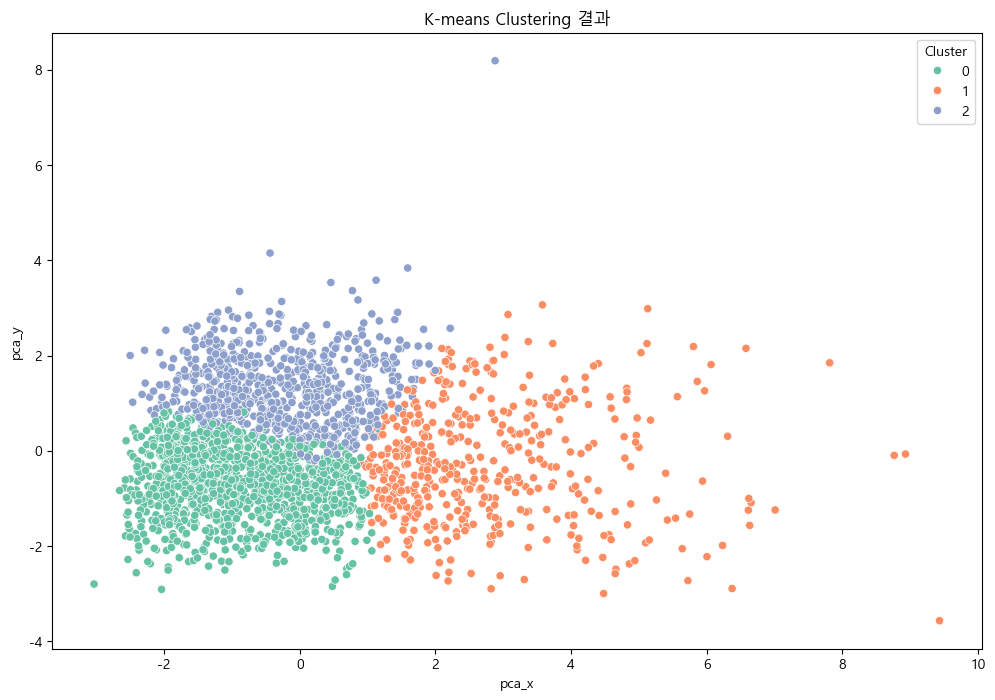

In [50]:
# PCA를 이용하여 2차원으로 축소 
pca = PCA(n_components=2)
pca_components = pca.fit_transform(travel_log_final)  # travel_log_final에서 PCA 수행

palette = sns.color_palette("Set2")

# PCA 결과를 travel_log_grouped에 추가
travel_log_grouped['pca_x'] = pca_components[:, 0]
travel_log_grouped['pca_y'] = pca_components[:, 1]

# 군집화 결과 확인 (Cluster가 이미 travel_log_grouped에 존재하는 상태에서)
print(travel_log_grouped[['TRAVEL_ID', 'Cluster']].head())

# 군집화 결과 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_grouped, palette=palette)
plt.title('K-means Clustering 결과')
plt.show()

In [51]:
travel_log_grouped

,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_ID,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TOTAL_MVMN_WON,TOTAL_ACTIVITY_WON,TOTAL_WON,TRAVEL_DURATION,SEASON,MAJOR_ACTIVITY_TYPE,Cluster,pca_x,pca_y
0,['배우자'],['남자'],['30대'],e_e000005,여,30,사무 종사자,한달,44180,50130,50110,중립,자연 선호(강),대전광역시,인천,2인 가족 여행,새로운 경험 추구,1,"112,300.00","413,500.00","525,800.00",4,Spring,['취식'],1,3.71,-0.34
1,없음,없음,없음,e_e000043,남,30,사무 종사자,1년,50110,11440,26350,도시 선호(강),중립,충청북도,경기,나홀로 여행,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",0,"42,925.00","118,800.00","161,725.00",3,Spring,['단순 구경 / 산책 / 걷기'],0,-0.32,-1.51
2,"['배우자', '기타', '기타', '기타']","['여자', '여자', '여자', '남자']","['40대', '40대', '70세이상', '50대']",e_e000191,남,30,기타,1년,42230,50110,42170,자연 선호(강),자연 선호(강),서울특별시,경기,자녀 동반 여행,여행 동반자와의 친밀감 및 유대감 증진,4,"98,000.00","194,000.00","292,000.00",3,Spring,['취식'],1,2.15,1.11
3,['친구'],['여자'],['20대'],e_e000316,여,20,사무 종사자,한달,50130,44825,11140,도시 선호(약),도시 선호(중),경상북도,서울,2인 여행(가족 외),"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,"204,300.00","333,750.00","538,050.00",3,Spring,['취식'],1,3.37,-2.03
4,"['자녀', '부모', '배우자', '자녀', '부모']","['남자', '남자', '남자', '여자', '여자']","['10대', '60대', '30대', '~9세이하', '60대']",e_e000668,여,30,서비스 종사자,한달,42150,45800,42210,자연 선호(중),자연 선호(강),서울특별시,인천,3대 동반 여행(친척 포함),"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",5,"86,400.00","210,000.00","296,400.00",1,Spring,['쇼핑 / 구매'],2,0.99,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,없음,없음,없음,g_g013127,여,30,사무 종사자,1년,42210,11680,44270,자연 선호(중),자연 선호(중),충청북도,충남,나홀로 여행,새로운 경험 추구,0,"45,500.00","48,079.00","93,579.00",1,Autumn,['취식'],0,-1.89,-1.05
2337,없음,없음,없음,g_g013128,여,20,학생,1년,50110,11680,30170,중립,도시 선호(중),광주광역시,대전,나홀로 여행,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",0,"35,400.00","18,300.00","53,700.00",1,Autumn,['취식'],0,-2.38,-2.00
2338,['연인'],['여자'],['20대'],g_g013131,남,20,기타,한달,11440,26500,50130,도시 선호(중),자연 선호(약),광주광역시,전남,2인 여행(가족 외),SNS 사진 등록 등 과시,1,"30,000.00","36,600.00","66,600.00",1,Autumn,"['단순 구경 / 산책 / 걷기', '휴식']",0,-2.12,-0.95
2339,['형제/자매'],['여자'],['20대'],h_h001459,남,30,학생,한달,50130,26350,11680,중립,자연 선호(중),서울특별시,제주,2인 가족 여행,새로운 경험 추구,1,"69,800.00","461,600.00","531,400.00",2,Summer,['휴식'],1,2.21,-1.39


<hr>
<h2>[분석 과정 - 군집화 시각화]</h2>

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\2952232563.py:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_grouped, palette=palette, s=100, edgecolor='k', ax=axs[0, 0])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\2952232563.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 1])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\2952232563.py:17: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 1])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\2952232563.py:23: UserWarning: The pal

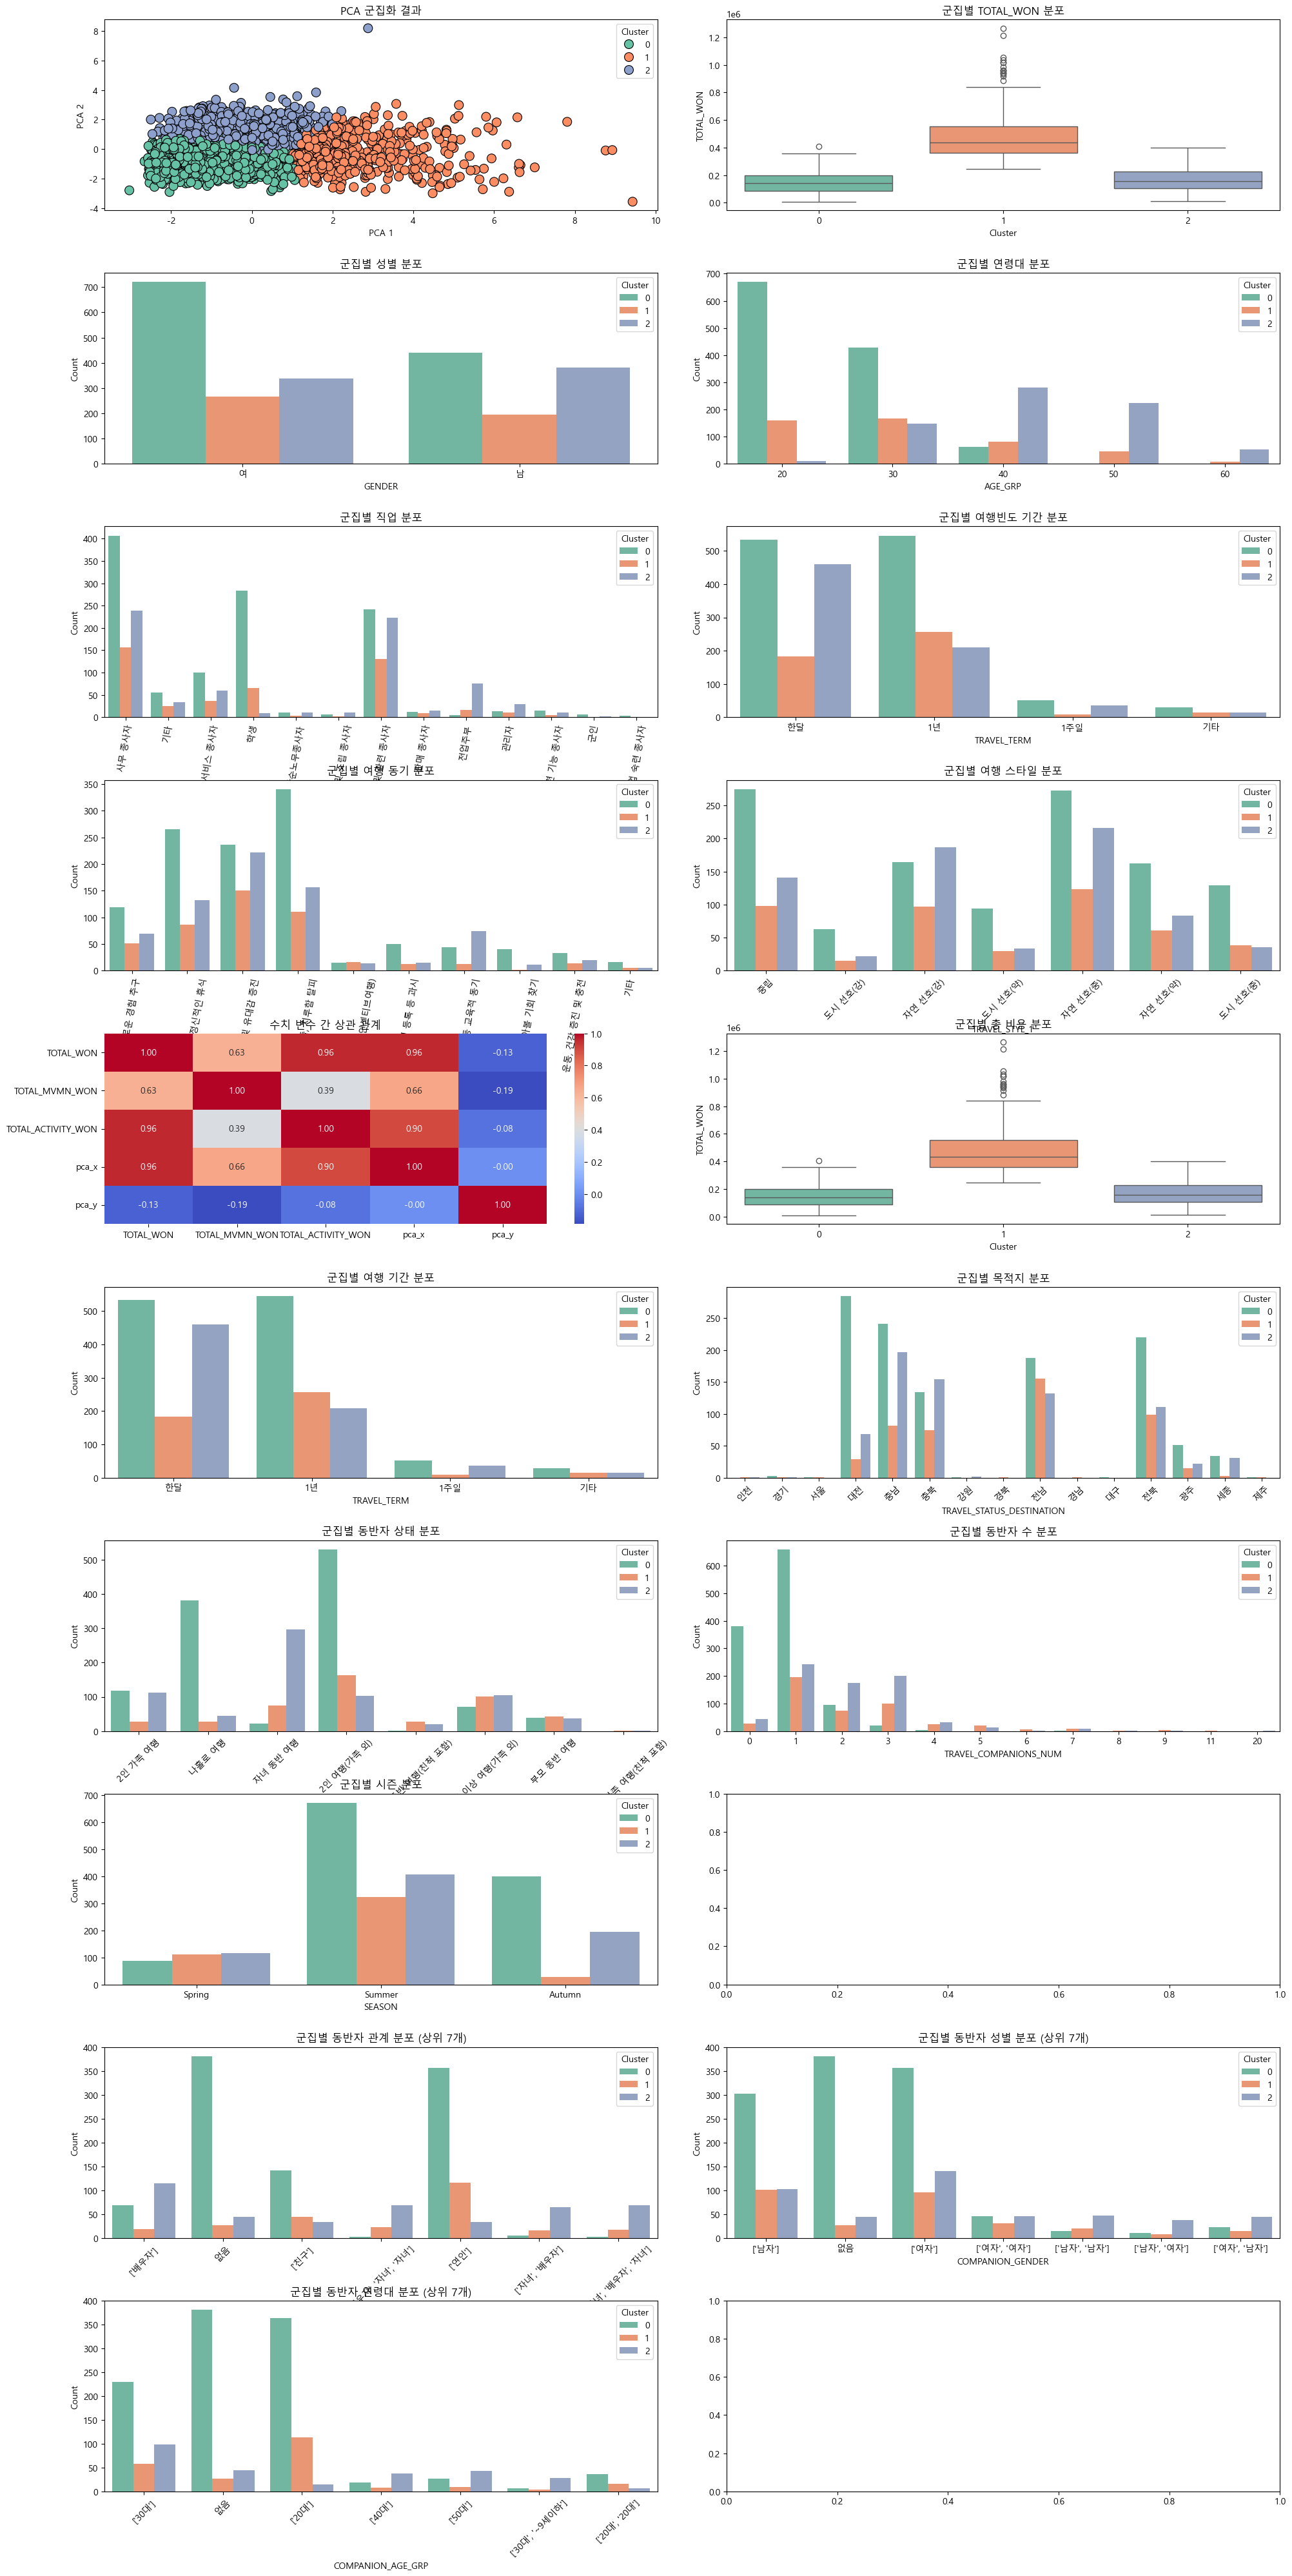

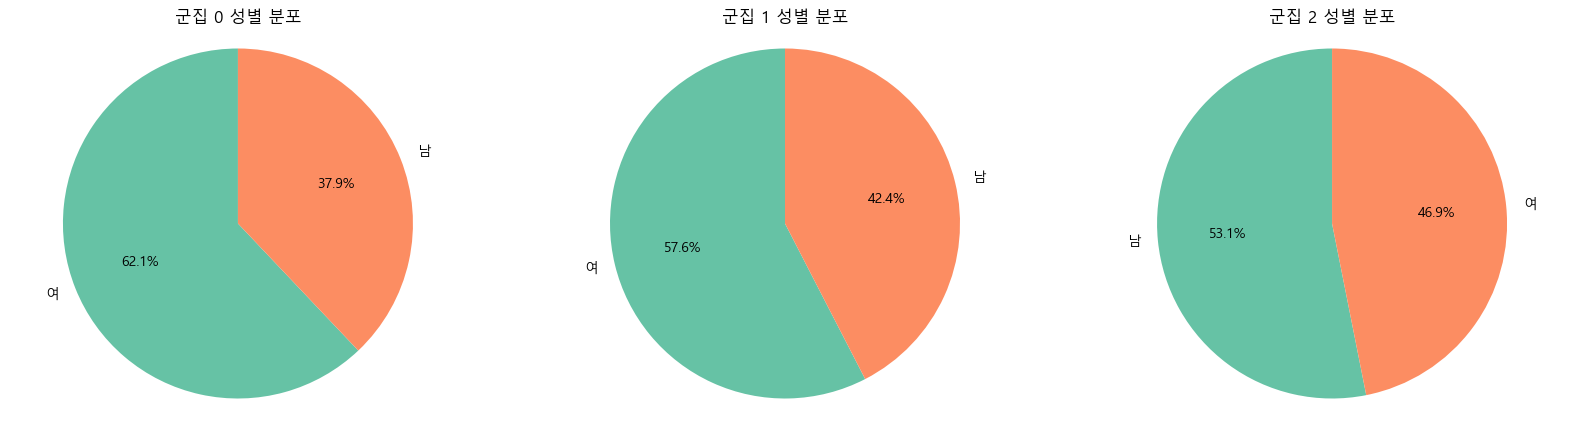

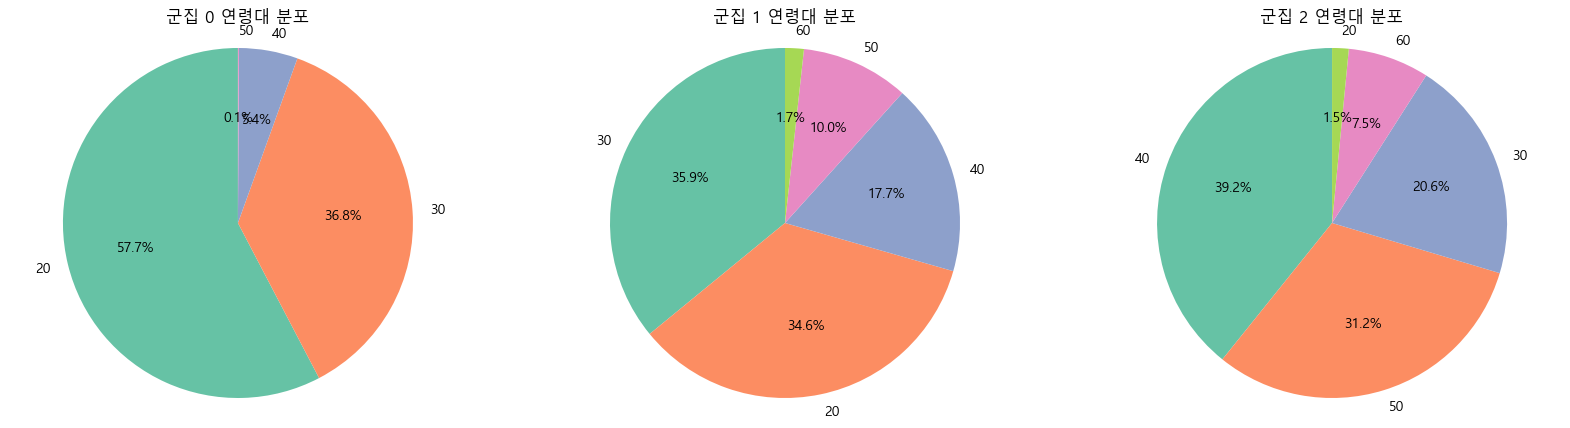

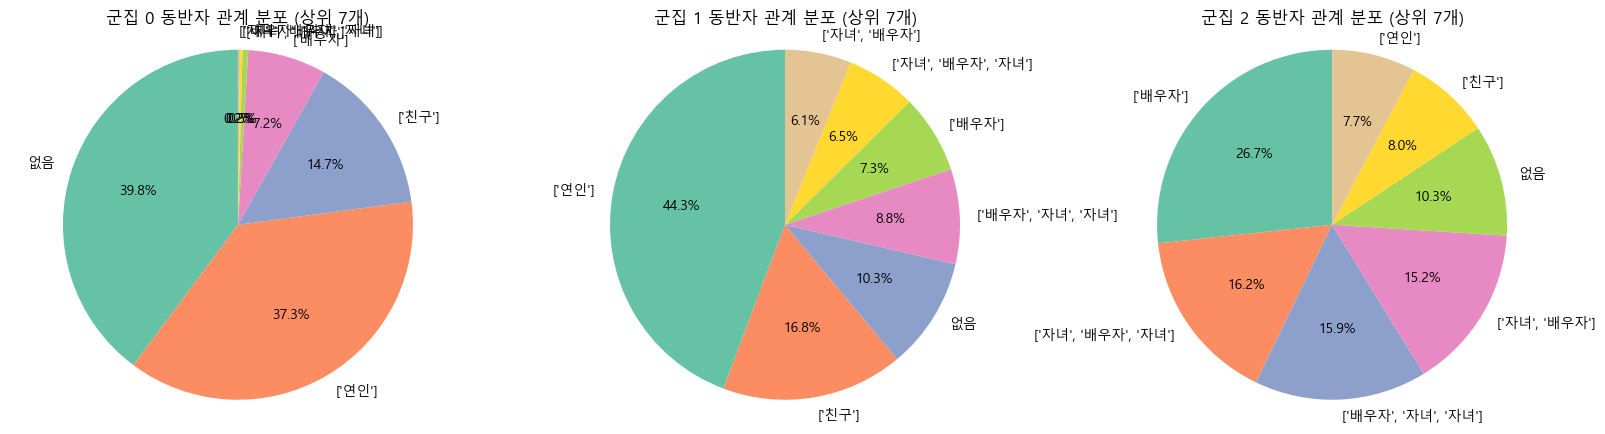

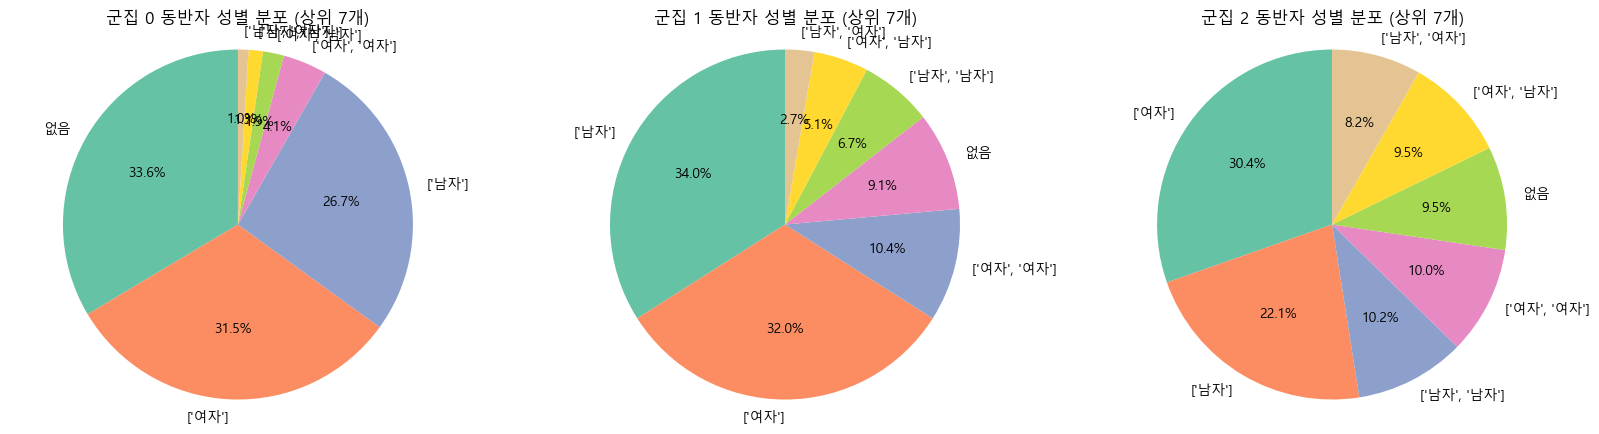

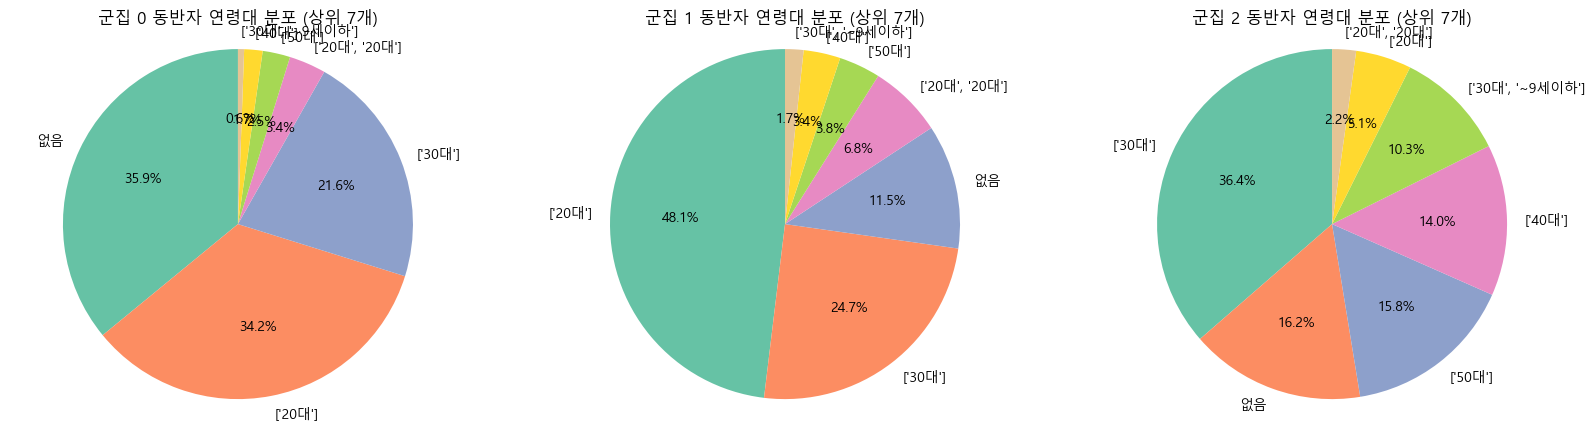

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 배치와 크기 설정
fig, axs = plt.subplots(10, 2, figsize=(20, 40))  # 행 개수를 늘려 추가 그래프 공간 확보
plt.tight_layout(pad=5.0)  # 서브플롯 간 간격 조정

palette = sns.color_palette("Set2")

# PCA 시각화
sns.scatterplot(x='pca_x', y='pca_y', hue='Cluster', data=travel_log_grouped, palette=palette, s=100, edgecolor='k', ax=axs[0, 0])
axs[0, 0].set_title('PCA 군집화 결과')
axs[0, 0].set_xlabel('PCA 1')
axs[0, 0].set_ylabel('PCA 2')

# 군집별 TOTAL_WON Boxplot
sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 1])
axs[0, 1].set_title('군집별 TOTAL_WON 분포')
axs[0, 1].set_xlabel('Cluster')
axs[0, 1].set_ylabel('TOTAL_WON')

# 군집별 성별 분포 (GENDER)
sns.countplot(x='GENDER', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[1, 0])
axs[1, 0].set_title('군집별 성별 분포')
axs[1, 0].set_xlabel('GENDER')
axs[1, 0].set_ylabel('Count')

# 군집별 연령대 분포 (AGE_GRP)
sns.countplot(x='AGE_GRP', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[1, 1])
axs[1, 1].set_title('군집별 연령대 분포')
axs[1, 1].set_xlabel('AGE_GRP')
axs[1, 1].set_ylabel('Count')

# 군집별 직업 분포 (JOB_NM)
sns.countplot(x='JOB_NM', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[2, 0])
axs[2, 0].set_title('군집별 직업 분포')
axs[2, 0].set_xlabel('OCCUPATION')
axs[2, 0].set_ylabel('Count')
axs[2, 0].tick_params(axis='x', rotation=80)

# 군집별 여행빈도 기간 분포 (TRAVEL_TERM)
sns.countplot(x='TRAVEL_TERM', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[2, 1])
axs[2, 1].set_title('군집별 여행빈도 기간 분포')
axs[2, 1].set_xlabel('TRAVEL_TERM')
axs[2, 1].set_ylabel('Count')

# 군집별 여행 동기 분포 (TRAVEL_MOTIVE)
sns.countplot(x='TRAVEL_MOTIVE', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[3, 0])
axs[3, 0].set_title('군집별 여행 동기 분포')
axs[3, 0].set_xlabel('TRAVEL_MOTIVE')
axs[3, 0].set_ylabel('Count')
axs[3, 0].tick_params(axis='x', rotation=80)

# 군집별 여행 스타일 분포 (TRAVEL_STYL_1)
sns.countplot(x='TRAVEL_STYL_1', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[3, 1])
axs[3, 1].set_title('군집별 여행 스타일 분포')
axs[3, 1].set_xlabel('TRAVEL_STYL_1')
axs[3, 1].set_ylabel('Count')
axs[3, 1].tick_params(axis='x', rotation=45)

# 수치 변수 간 상관 관계 Heatmap
corr = travel_log_grouped[['TOTAL_WON', 'TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'pca_x', 'pca_y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[4, 0])
axs[4, 0].set_title('수치 변수 간 상관 관계')

# 군집별 총 비용(TOTAL_WON) 분포 (Boxplot)
sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[4, 1])
axs[4, 1].set_title('군집별 총 비용 분포')
axs[4, 1].set_xlabel('Cluster')
axs[4, 1].set_ylabel('TOTAL_WON')

# 군집별 여행 기간 (TRAVEL_TERM) 분포
sns.countplot(x='TRAVEL_TERM', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[5, 0])
axs[5, 0].set_title('군집별 여행 기간 분포')
axs[5, 0].set_xlabel('TRAVEL_TERM')
axs[5, 0].set_ylabel('Count')

# 군집별 목적지 (TRAVEL_STATUS_DESTINATION) 분포
sns.countplot(x='TRAVEL_STATUS_DESTINATION', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[5, 1])
axs[5, 1].set_title('군집별 목적지 분포')
axs[5, 1].set_xlabel('TRAVEL_STATUS_DESTINATION')
axs[5, 1].set_ylabel('Count')
axs[5, 1].tick_params(axis='x', rotation=45)

# 군집별 동반자 상태 (TRAVEL_STATUS_ACCOMPANY) 분포
sns.countplot(x='TRAVEL_STATUS_ACCOMPANY', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[6, 0])
axs[6, 0].set_title('군집별 동반자 상태 분포')
axs[6, 0].set_xlabel('TRAVEL_STATUS_ACCOMPANY')
axs[6, 0].set_ylabel('Count')
axs[6, 0].tick_params(axis='x', rotation=45)

# 군집별 동반자 수 (TRAVEL_COMPANIONS_NUM) 분포
sns.countplot(x='TRAVEL_COMPANIONS_NUM', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[6, 1])
axs[6, 1].set_title('군집별 동반자 수 분포')
axs[6, 1].set_xlabel('TRAVEL_COMPANIONS_NUM')
axs[6, 1].set_ylabel('Count')

# 군집별 시즌 (SEASON) 분포
sns.countplot(x='SEASON', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[7, 0])
axs[7, 0].set_title('군집별 시즌 분포')
axs[7, 0].set_xlabel('SEASON')
axs[7, 0].set_ylabel('Count')

# REL_CD (동반자 관계) Countplot - 상위 7개
rel_cd_top7 = travel_log_grouped['REL_CD'].value_counts().nlargest(7).index
sns.countplot(
    x='REL_CD', 
    hue='Cluster', 
    data=travel_log_grouped[travel_log_grouped['REL_CD'].isin(rel_cd_top7)], 
    palette=palette, 
    ax=axs[8, 0]
)
axs[8, 0].set_title('군집별 동반자 관계 분포 (상위 7개)')
axs[8, 0].set_xlabel('REL_CD')
axs[8, 0].set_ylabel('Count')
axs[8, 0].tick_params(axis='x', rotation=45)

# COMPANION_GENDER (동반자 성별) Countplot - 상위 7개
comp_gen_top7 = travel_log_grouped['COMPANION_GENDER'].value_counts().nlargest(7).index
sns.countplot(
    x='COMPANION_GENDER', 
    hue='Cluster', 
    data=travel_log_grouped[travel_log_grouped['COMPANION_GENDER'].isin(comp_gen_top7)], 
    palette=palette, 
    ax=axs[8, 1]
)
axs[8, 1].set_title('군집별 동반자 성별 분포 (상위 7개)')
axs[8, 1].set_xlabel('COMPANION_GENDER')
axs[8, 1].set_ylabel('Count')

# COMPANION_AGE_GRP (동반자 연령대) Countplot - 상위 7개
comp_age_grp_top7 = travel_log_grouped['COMPANION_AGE_GRP'].value_counts().nlargest(7).index
sns.countplot(
    x='COMPANION_AGE_GRP', 
    hue='Cluster', 
    data=travel_log_grouped[travel_log_grouped['COMPANION_AGE_GRP'].isin(comp_age_grp_top7)], 
    palette=palette, 
    ax=axs[9, 0]
)
axs[9, 0].set_title('군집별 동반자 연령대 분포 (상위 7개)')
axs[9, 0].set_xlabel('COMPANION_AGE_GRP')
axs[9, 0].set_ylabel('Count')
axs[9, 0].tick_params(axis='x', rotation=45)

# 원형 그래프들 별도로 그리기
fig2, axs2 = plt.subplots(1, 3, figsize=(20, 5))

for i, cluster in enumerate([0, 1, 2]):
    # 성별 원형 그래프
    gender_dist = travel_log_grouped[travel_log_grouped['Cluster'] == cluster]['GENDER'].value_counts()
    axs2[i].pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', startangle=90, colors=palette)
    axs2[i].set_title(f'군집 {cluster} 성별 분포')
    axs2[i].axis('equal')  # 원이 비례적으로 보이게 설정

# 연령대 원형 그래프
fig3, axs3 = plt.subplots(1, 3, figsize=(20, 5))
for i, cluster in enumerate([0, 1, 2]):
    age_dist = travel_log_grouped[travel_log_grouped['Cluster'] == cluster]['AGE_GRP'].value_counts()
    axs3[i].pie(age_dist, labels=age_dist.index, autopct='%1.1f%%', startangle=90, colors=palette)
    axs3[i].set_title(f'군집 {cluster} 연령대 분포')
    axs3[i].axis('equal')  # 원이 비례적으로 보이게 설정

# 원형 그래프 추가: 군집별 REL_CD 분포 - 상위 7개
fig_rel_cd, axs_rel_cd = plt.subplots(1, 3, figsize=(20, 5))
for i, cluster in enumerate([0, 1, 2]):
    rel_cd_dist = travel_log_grouped[travel_log_grouped['Cluster'] == cluster]['REL_CD'].value_counts()
    rel_cd_dist = rel_cd_dist[rel_cd_dist.index.isin(rel_cd_top7)]
    axs_rel_cd[i].pie(rel_cd_dist, labels=rel_cd_dist.index, autopct='%1.1f%%', startangle=90, colors=palette)
    axs_rel_cd[i].set_title(f'군집 {cluster} 동반자 관계 분포 (상위 7개)')
    axs_rel_cd[i].axis('equal')

# 원형 그래프 추가: 군집별 COMPANION_GENDER 분포 - 상위 7개
fig_comp_gen, axs_comp_gen = plt.subplots(1, 3, figsize=(20, 5))
for i, cluster in enumerate([0, 1, 2]):
    comp_gen_dist = travel_log_grouped[travel_log_grouped['Cluster'] == cluster]['COMPANION_GENDER'].value_counts()
    comp_gen_dist = comp_gen_dist[comp_gen_dist.index.isin(comp_gen_top7)]
    axs_comp_gen[i].pie(comp_gen_dist, labels=comp_gen_dist.index, autopct='%1.1f%%', startangle=90, colors=palette)
    axs_comp_gen[i].set_title(f'군집 {cluster} 동반자 성별 분포 (상위 7개)')
    axs_comp_gen[i].axis('equal')

# 원형 그래프 추가: 군집별 COMPANION_AGE_GRP 분포 - 상위 7개
fig_comp_age, axs_comp_age = plt.subplots(1, 3, figsize=(20, 5))
for i, cluster in enumerate([0, 1, 2]):
    comp_age_dist = travel_log_grouped[travel_log_grouped['Cluster'] == cluster]['COMPANION_AGE_GRP'].value_counts()
    comp_age_dist = comp_age_dist[comp_age_dist.index.isin(comp_age_grp_top7)]
    axs_comp_age[i].pie(comp_age_dist, labels=comp_age_dist.index, autopct='%1.1f%%', startangle=90, colors=palette)
    axs_comp_age[i].set_title(f'군집 {cluster} 동반자 연령대 분포 (상위 7개)')
    axs_comp_age[i].axis('equal')

plt.show()

>군집 특징 정리
>1. 군집 0 : 
<br>여자가 제일 많음, 20대가 제일 많음(2번째가 30대), 
<br>학생 비율이 좀 높음, 
<br>여행빈도 기간 한달에서 1년, 
<br>군집별 여행 동기는 일상적인 환경 및 역할에서의 탈출, 지루함 탈피 (2번째가 쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식), 
<br>목적지는 대전/충남/전북/전남, 
<br>동반자 상태는 2인 여행(가족 외) 2번째는 나 홀로 여행, 
<br>동반자수 1명 또는 0명, 동반자 관계는 연인, 동반자 연령대는 20대, 30대

> 2. 군집 1 :
<br>TOTAL_WON이 제일 많음, 
<br>여행빈도 기간 1년,(2번째가 한달), 
<br>여행 동기는 여행 동반자와의 친밀감 및 유대감 증진, 
<br>목적지는 전남/전북/충남/충북, 
<br>동반자 상태는 2인 여행(가족 외), 동반자 수 1명/3명, 동반자 관계는 연인, 동반자 연령대는 20대

>3. 군집 2 : 
<br>40대가 제일 많음(2번째가 50대), 
<br>여행빈도 기간 한달(2번째가 1년), 
<br>여행 동기는 여행 동반자와의 친밀감 및 유대감 증진,
<br>목적지는 충남/충북/전남/전북, 
<br>동반자 상태는 자녀 동반 여행, 동반자 수 1명/3명, 동반자 관계는 배우자, <br>자녀, 동반자 연령대는 30대

>4. 기타 : 
<br>-> 어느 군집이나 사무 종사자가 제일 많은데 군집0은 학생이 좀 많음
<br>-> 모두 다 여행 스타일은 자연 선호
<br>-> 다들 여름 선호, 군집0.2는 2번째로 가을 선호 / 군집1은 2번째로 봄 선호

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\380139156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 0])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\380139156.py:8: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 0])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\380139156.py:14: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x='AGE_GRP', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[0, 1])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\380139156.py:20: UserWarning: The palette list has more values (8) than need

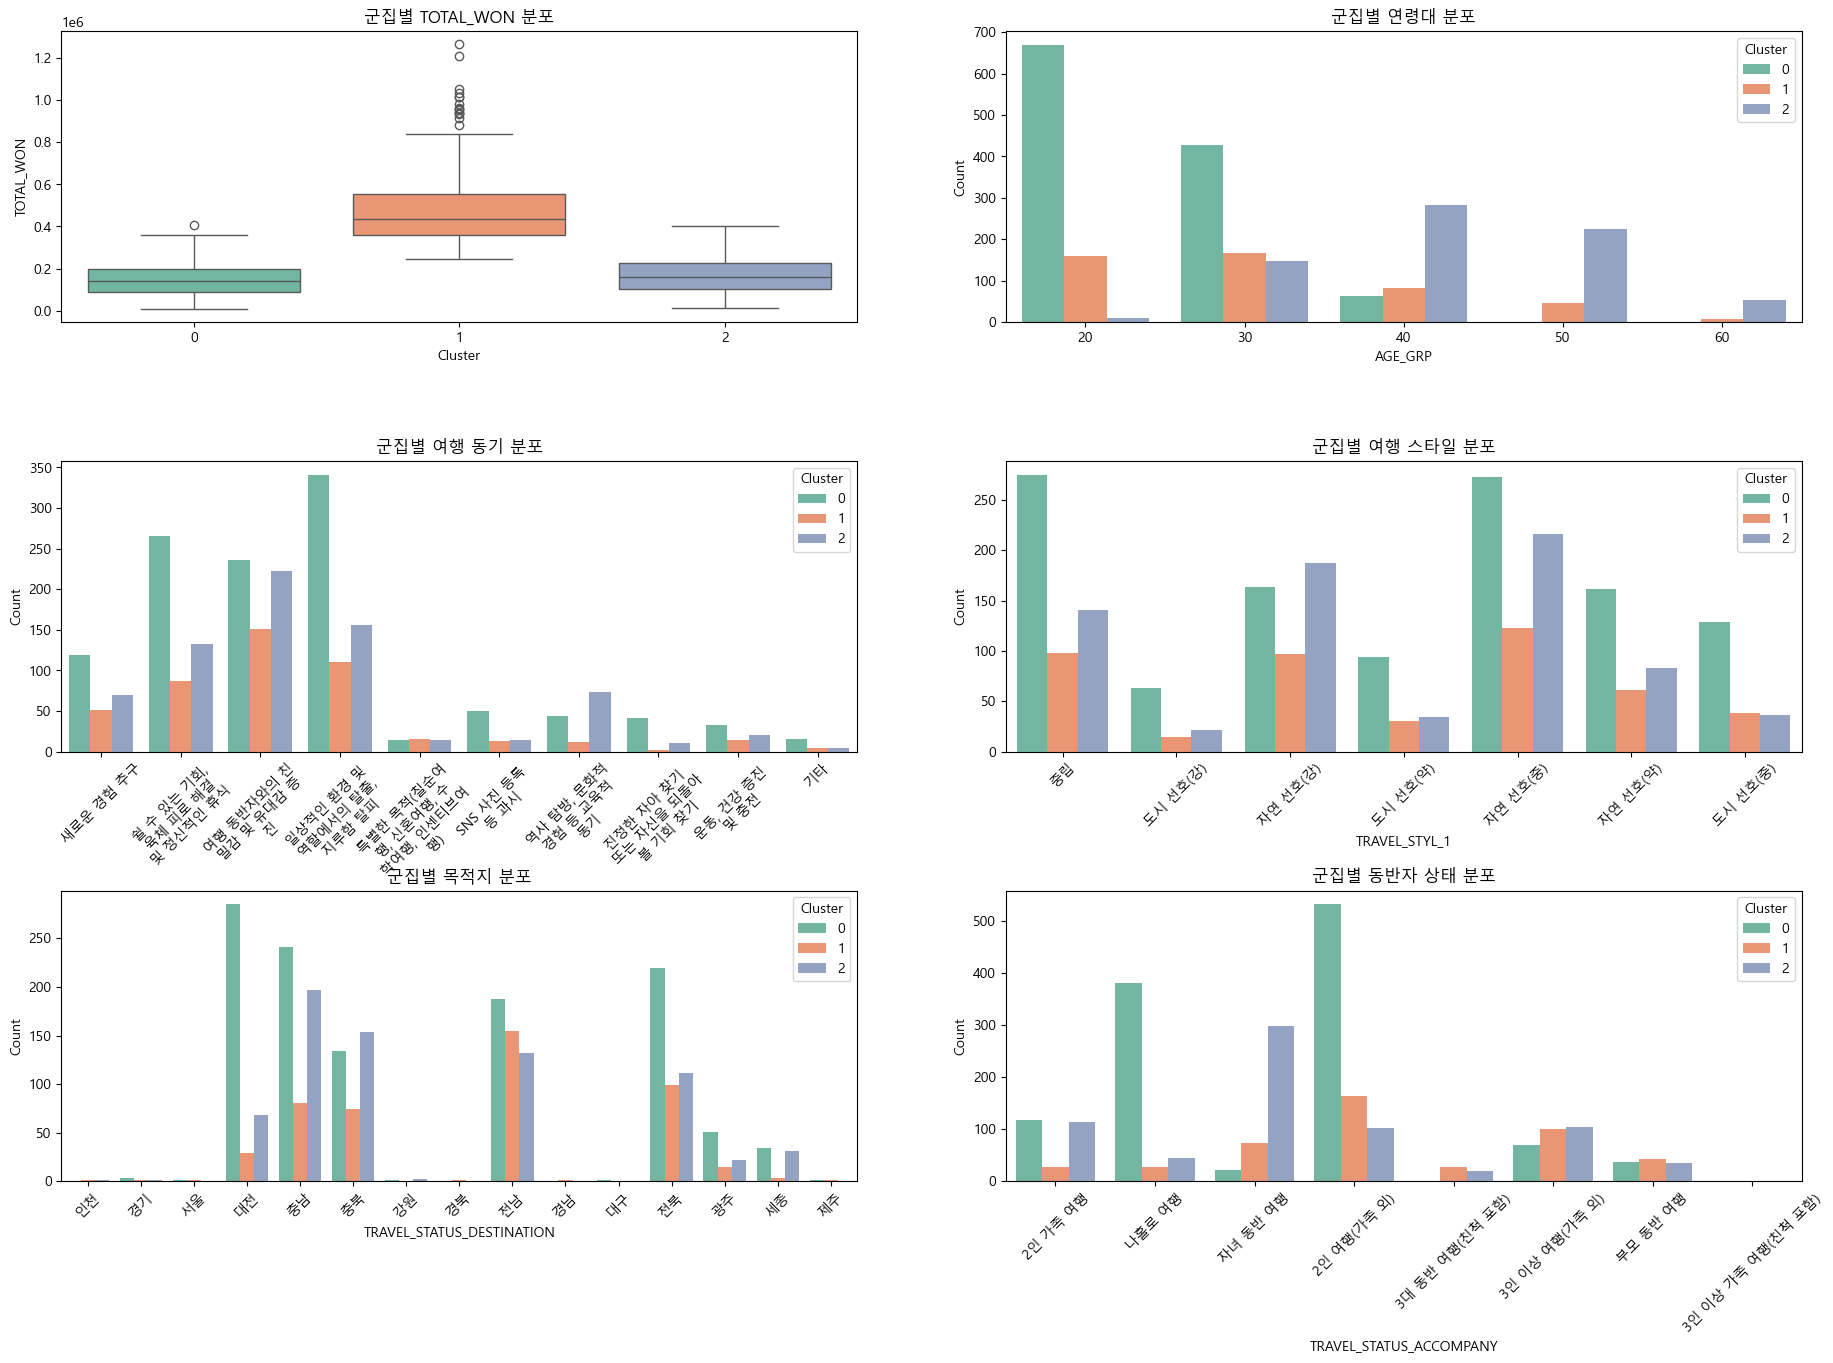

In [53]:
# 그래프의 배치와 크기 설정
fig, axs = plt.subplots(3, 2, figsize=(20, 14))  
plt.tight_layout(pad=8.0)  # 서브플롯 간 간격 조정

palette = sns.color_palette("Set2")

# 군집별 TOTAL_WON Boxplot
sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 0])
axs[0, 0].set_title('군집별 TOTAL_WON 분포')
axs[0, 0].set_xlabel('Cluster')
axs[0, 0].set_ylabel('TOTAL_WON')

# 군집별 연령대 분포 (AGE_GRP)
sns.countplot(x='AGE_GRP', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[0, 1])
axs[0, 1].set_title('군집별 연령대 분포')
axs[0, 1].set_xlabel('AGE_GRP')
axs[0, 1].set_ylabel('Count')

# 군집별 여행 동기 분포 (TRAVEL_MOTIVE)
sns.countplot(x='TRAVEL_MOTIVE', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[1, 0])
axs[1, 0].set_title('군집별 여행 동기 분포')
axs[1, 0].set_xlabel('TRAVEL_MOTIVE')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45)
# x축 레이블 두 줄로 설정 (일정 길이 기준으로 나누기)
def split_label(label, max_length=10):
    """긴 레이블을 max_length 기준으로 줄바꿈."""
    return "\n".join([label[i:i+max_length] for i in range(0, len(label), max_length)])

labels = [label.get_text() for label in axs[1, 0].get_xticklabels()]
new_labels = [split_label(label, max_length=10) for label in labels]  # 10자로 자르기
axs[1, 0].set_xticklabels(new_labels)

# 군집별 여행 스타일 분포 (TRAVEL_STYL_1)
sns.countplot(x='TRAVEL_STYL_1', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[1, 1])
axs[1, 1].set_title('군집별 여행 스타일 분포')
axs[1, 1].set_xlabel('TRAVEL_STYL_1')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)

# 군집별 목적지 (TRAVEL_STATUS_DESTINATION) 분포
sns.countplot(x='TRAVEL_STATUS_DESTINATION', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[2, 0])
axs[2, 0].set_title('군집별 목적지 분포')
axs[2, 0].set_xlabel('TRAVEL_STATUS_DESTINATION')
axs[2, 0].set_ylabel('Count')
axs[2, 0].tick_params(axis='x', rotation=45)

# 군집별 동반자 상태 (TRAVEL_STATUS_ACCOMPANY) 분포
sns.countplot(x='TRAVEL_STATUS_ACCOMPANY', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[2, 1])
axs[2, 1].set_title('군집별 동반자 상태 분포')
axs[2, 1].set_xlabel('TRAVEL_STATUS_ACCOMPANY')
axs[2, 1].set_ylabel('Count')
axs[2, 1].tick_params(axis='x', rotation=45)

plt.show()

C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\1241254284.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 0])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\1241254284.py:8: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 0])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\1241254284.py:14: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x='AGE_GRP', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[0, 1])
C:\Users\kimbomi\AppData\Local\Temp\ipykernel_25756\1241254284.py:25: UserWarning: The palette list has more values (8) than 

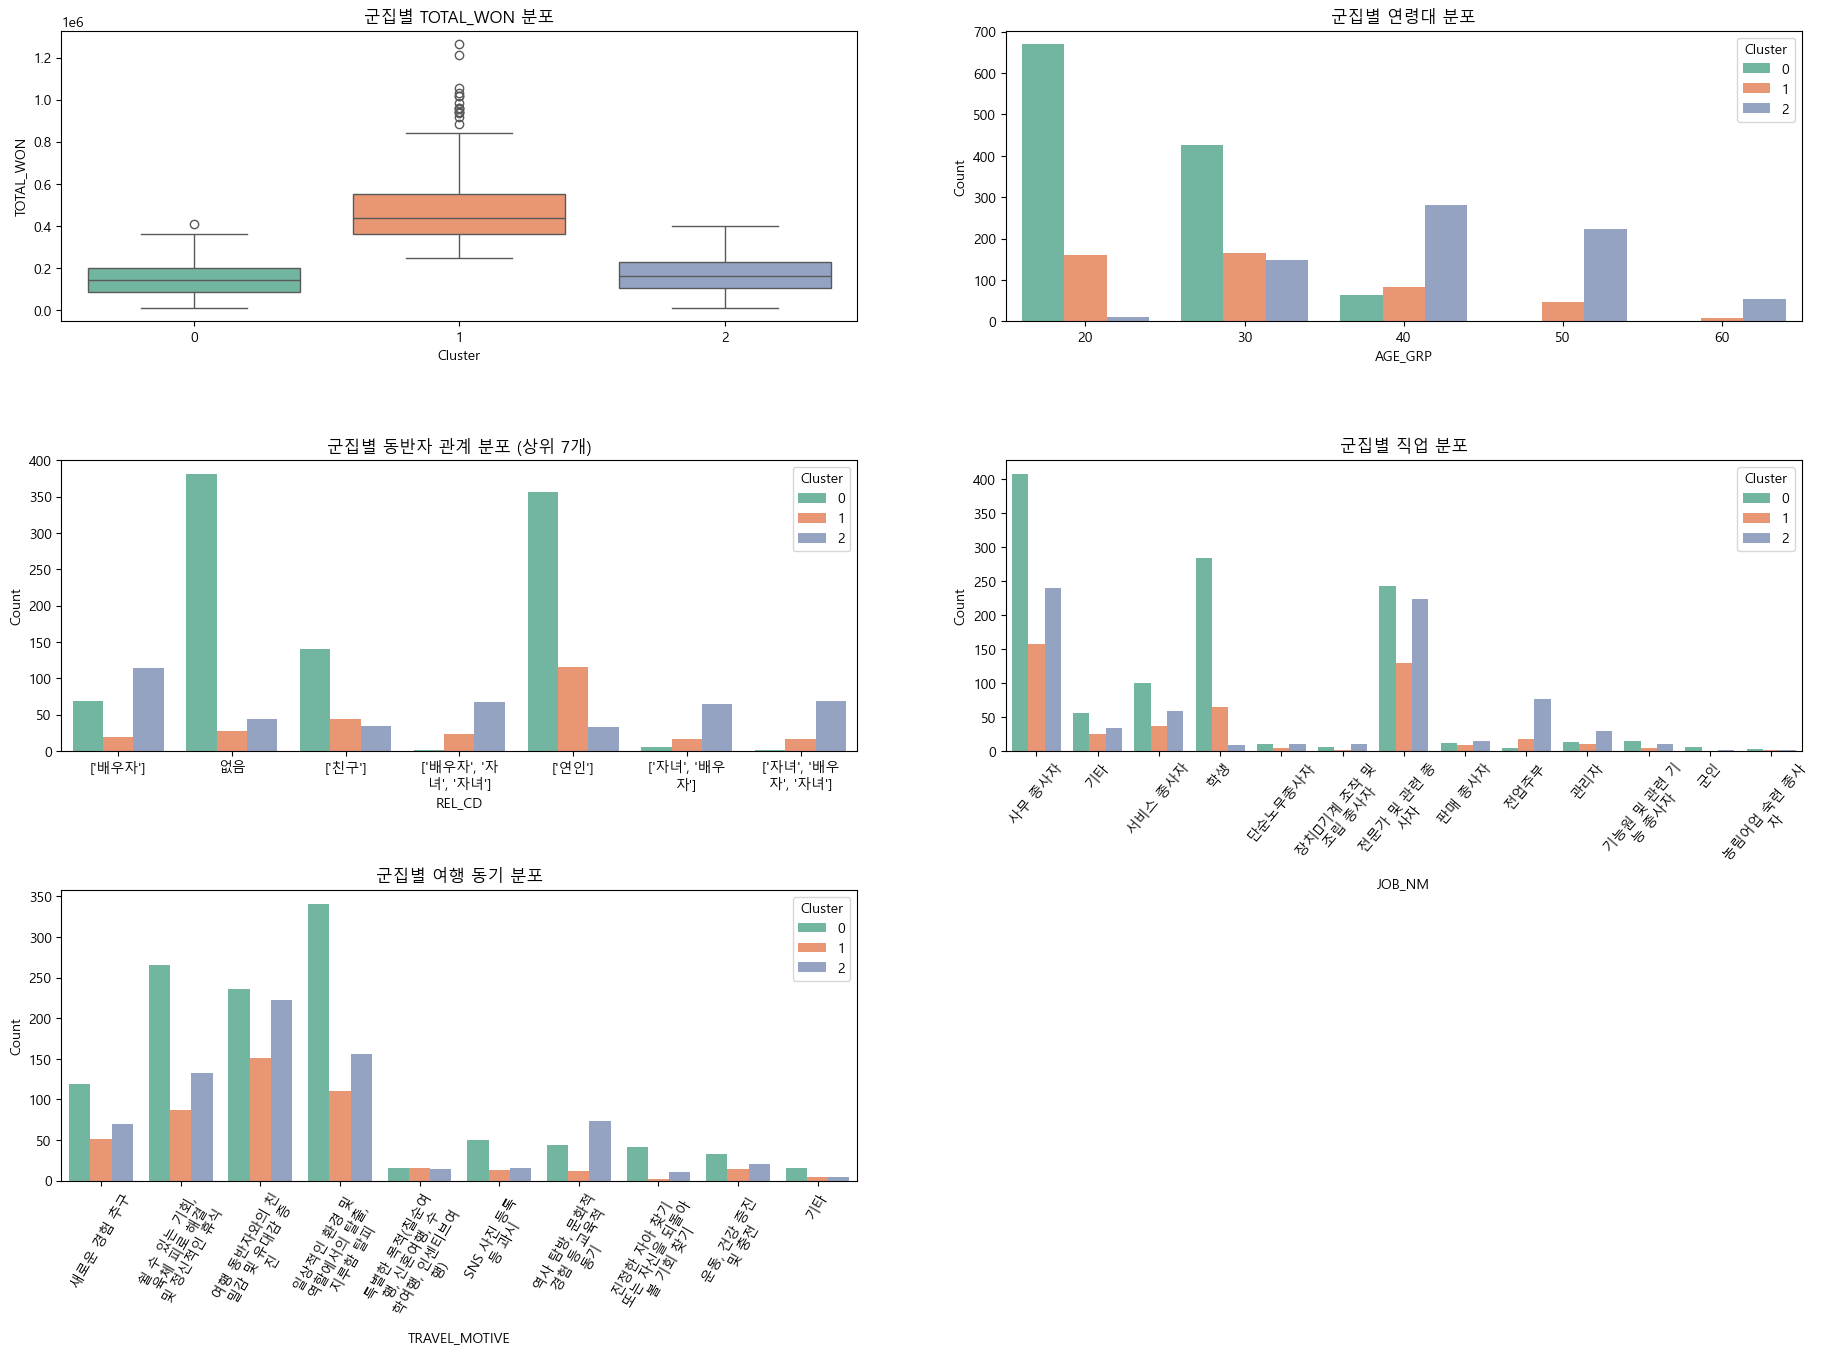

In [54]:
# 그래프의 배치와 크기 설정
fig, axs = plt.subplots(3, 2, figsize=(20, 14))  
plt.tight_layout(pad=8.0)  # 서브플롯 간 간격 조정

palette = sns.color_palette("Set2")

# 군집별 총 금액 분포 (TOTAL_WON)
sns.boxplot(x='Cluster', y='TOTAL_WON', data=travel_log_grouped, palette=palette, ax=axs[0, 0])
axs[0, 0].set_title('군집별 TOTAL_WON 분포')
axs[0, 0].set_xlabel('Cluster')
axs[0, 0].set_ylabel('TOTAL_WON')

# 군집별 연령대 분포 (AGE_GRP)
sns.countplot(x='AGE_GRP', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[0, 1])
axs[0, 1].set_title('군집별 연령대 분포')
axs[0, 1].set_xlabel('AGE_GRP')
axs[0, 1].set_ylabel('Count')

# 긴 레이블을 처리하기 위한 split_label 함수
def split_label(label, max_length=10):
    """긴 레이블을 max_length 기준으로 줄바꿈."""
    return "\n".join([label[i:i+max_length] for i in range(0, len(label), max_length)])

# 군집별 여행 동기 분포 (TRAVEL_MOTIVE)
sns.countplot(x='TRAVEL_MOTIVE', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[2, 0])
axs[2, 0].set_title('군집별 여행 동기 분포')
axs[2, 0].set_xlabel('TRAVEL_MOTIVE')
axs[2, 0].set_ylabel('Count')
axs[2, 0].tick_params(axis='x', rotation=60)

# TRAVEL_MOTIVE 레이블 수정
labels_tm = [label.get_text() for label in axs[2, 0].get_xticklabels()]
new_labels_tm = [split_label(label, max_length=10) for label in labels_tm]
axs[2, 0].set_xticklabels(new_labels_tm)

# 군집별 직업 분포 (JOB_NM)
sns.countplot(x='JOB_NM', hue='Cluster', data=travel_log_grouped, palette=palette, ax=axs[1, 1])
axs[1, 1].set_title('군집별 직업 분포')
axs[1, 1].set_xlabel('JOB_NM')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=50)

# JOB_NM 레이블 수정
labels_job = [label.get_text() for label in axs[1, 1].get_xticklabels()]
new_labels_job = [split_label(label, max_length=10) for label in labels_job]
axs[1, 1].set_xticklabels(new_labels_job)

# 동반자 관계 상위 7개 분포 (REL_CD)
rel_cd_top7 = travel_log_grouped['REL_CD'].value_counts().nlargest(7).index
sns.countplot(
    x='REL_CD', 
    hue='Cluster', 
    data=travel_log_grouped[travel_log_grouped['REL_CD'].isin(rel_cd_top7)], 
    palette=palette, 
    ax=axs[1, 0]
)
axs[1, 0].set_title('군집별 동반자 관계 분포 (상위 7개)')
axs[1, 0].set_xlabel('REL_CD')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=0)

# REL_CD 레이블 수정
labels_rel = [label.get_text() for label in axs[1, 0].get_xticklabels()]
new_labels_rel = [split_label(label, max_length=10) for label in labels_rel]
axs[1, 0].set_xticklabels(new_labels_rel)

# 마지막 서브플롯 비우기
axs[2, 1].axis('off')  # 마지막 서브플롯을 비활성화

plt.show()
